# Practical Lab 6 - Logistic Regression
**Name: Chen, Kun**<br/>
**ID: 8977010**

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### 0. Load iris dataset

In [63]:
iris = datasets.load_iris()

iris_dataframe = pd.DataFrame(iris.data,  columns=iris.feature_names)
iris_dataframe['target'] = iris.target
target_names = {
    0:'non-virginica',
    1:'non-virginica', 
    2:'virginica'
}
iris_dataframe['target_names'] = iris_dataframe['target'].map(target_names)
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,non-virginica
1,4.9,3.0,1.4,0.2,0,non-virginica
2,4.7,3.2,1.3,0.2,0,non-virginica
3,4.6,3.1,1.5,0.2,0,non-virginica
4,5.0,3.6,1.4,0.2,0,non-virginica


### 1. Check that the dataset contains invalid data, outlier and drop the duplicate data items

In [64]:
iris_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   target_names       150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


According to the following figure, we can see that the data distribution is good, there are not too many outlier.

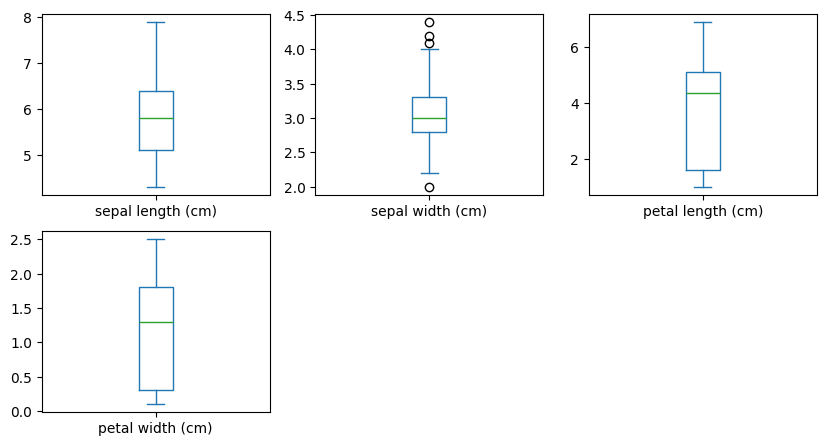

In [65]:
iris_dataframe[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']] \
    .plot(kind='box', subplots=True, layout=(3, 3), figsize=(10, 8))
plt.show()

### 2. Print descriptive statistics of two classes

In [66]:
iris_dataframe.groupby('target_names').describe().transpose()

target_names             non-virginica  virginica
sepal length (cm) count     100.000000  50.000000
                  mean        5.471000   6.588000
                  std         0.641698   0.635880
                  min         4.300000   4.900000
                  25%         5.000000   6.225000
                  50%         5.400000   6.500000
                  75%         5.900000   6.900000
                  max         7.000000   7.900000
sepal width (cm)  count     100.000000  50.000000
                  mean        3.099000   2.974000
                  std         0.478739   0.322497
                  min         2.000000   2.200000
                  25%         2.800000   2.800000
                  50%         3.050000   3.000000
                  75%         3.400000   3.175000
                  max         4.400000   3.800000
petal length (cm) count     100.000000  50.000000
                  mean        2.861000   5.552000
                  std         1.449549   0.551895
                  min         1.000000   4.500000
                  25%         1.500000   5.100000
                  50%         2.450000   5.550000
                  75%         4.325000   5.875000
                  max         5.100000   6.900000
petal width (cm)  count     100.000000  50.000000
                  mean        0.786000   2.026000
                  std         0.565153   0.274650
                  min         0.100000   1.400000
                  25%         0.200000   1.800000
                  50%         0.800000   2.000000
                  75%         1.300000   2.300000
                  max         1.800000   2.500000
target            count     100.000000  50.000000
                  mean        0.500000   2.000000
                  std         0.502519   0.000000
                  min         0.000000   2.000000
                  25%         0.000000   2.000000
                  50%         0.500000   2.000000
                  75%         1.000000   2.000000
                  max         1.000000   2.000000

### 3. Plot histogram per feature for each of tow classes
Based on the distribution of virginica and non-virginica across features, it can be seen that virginica and non-virginica are very different across features

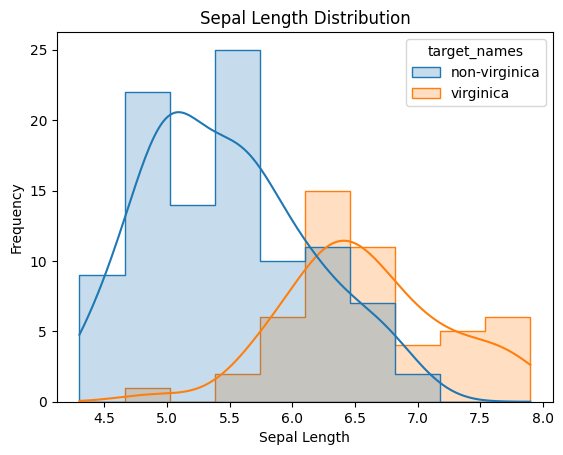

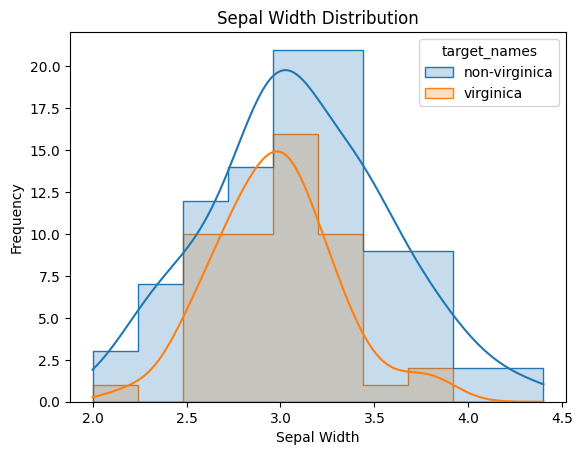

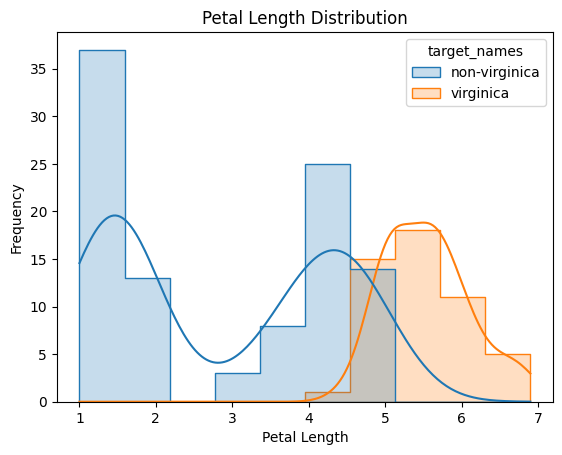

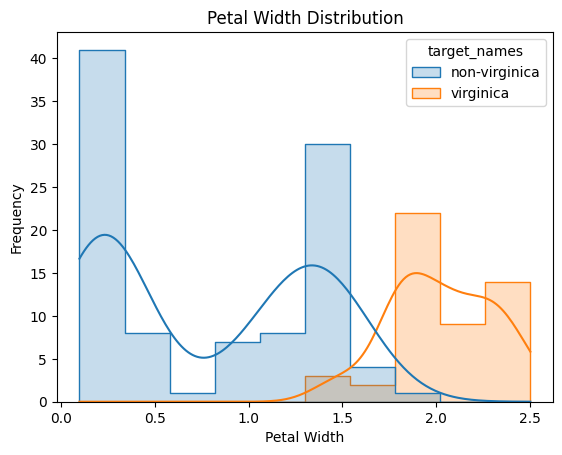

In [67]:
sns.histplot(data=iris_dataframe, x="sepal length (cm)", hue="target_names", bins=10, kde=True, element="step")
plt.title("Sepal Length Distribution")
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.show()

sns.histplot(data=iris_dataframe, x="sepal width (cm)", hue="target_names", bins=10, kde=True, element="step")
plt.title("Sepal Width Distribution")
plt.xlabel("Sepal Width")
plt.ylabel("Frequency")
plt.show()

sns.histplot(data=iris_dataframe, x="petal length (cm)", hue="target_names", bins=10, kde=True, element="step")
plt.title("Petal Length Distribution")
plt.xlabel("Petal Length")
plt.ylabel("Frequency")
plt.show()

sns.histplot(data=iris_dataframe, x="petal width (cm)", hue="target_names", bins=10, kde=True, element="step")
plt.title("Petal Width Distribution")
plt.xlabel("Petal Width")
plt.ylabel("Frequency")
plt.show()

### 4. Correlation matrix between the four features
The length and width correlation for petal is very high at 0.96. The length and width band for sepal is believed to be extremely low.

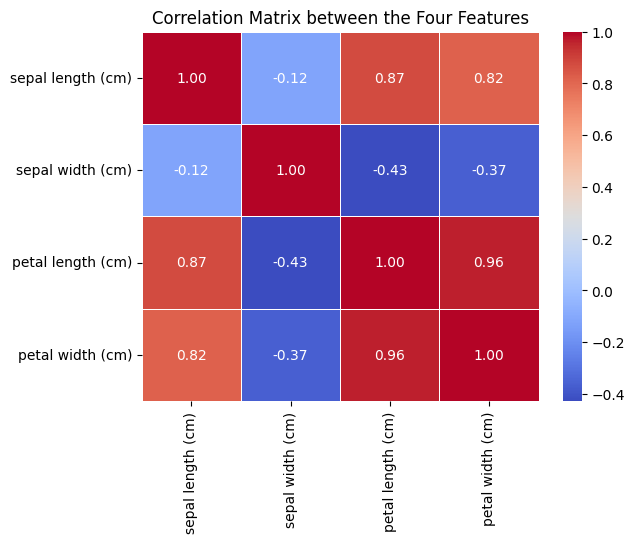

In [68]:
correlation_matrix = iris_dataframe[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between the Four Features')
plt.show()

### 5. Use seaborn's FacetGrid to color the scatterplot by species
According to the picture below we can seen that virginica has a more elongated sepal shape based on the value of the sepal's height to width ratio. This is an important distinction between virginica and non-virginica. <br/>
refe: https://www.kaggle.com/code/palak98039/python-data-visualizations

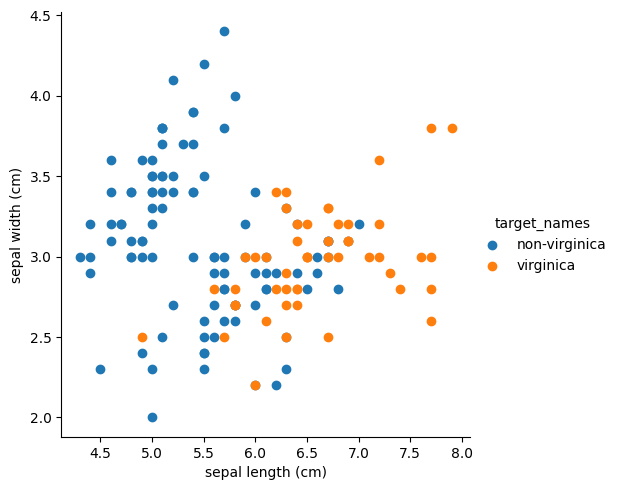

In [69]:
sns.FacetGrid(iris_dataframe, hue='target_names', height=5) \
   .map(plt.scatter, 'sepal length (cm)', 'sepal width (cm)') \
   .add_legend()
plt.show()

Base on below graph, It is easier to distinguish between virginica and non-virginica based on the length and width of the petal.<br/>
refe: https://www.kaggle.com/code/mdismielhossenabir/analysis-data-visualization-techniques

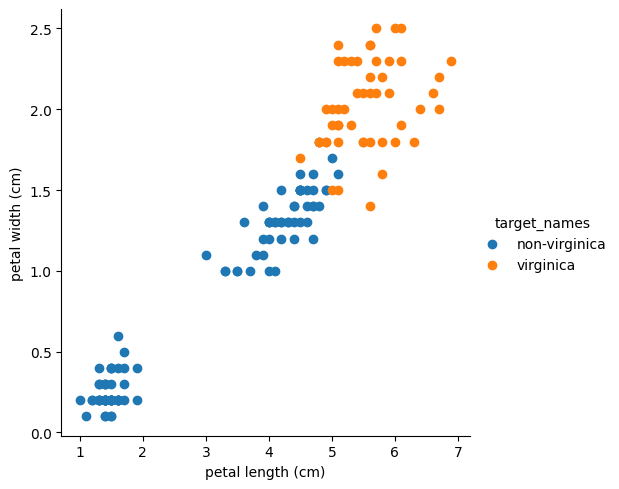

In [70]:
sns.FacetGrid(iris_dataframe, hue='target_names', height=5) \
   .map(plt.scatter, 'petal length (cm)', 'petal width (cm)') \
   .add_legend()
plt.show()

Use catplot bar to compare the distrbution of sepal width and length. <br/>
Use catplot bar to compare the distrbution of petal width and length.<br/>
refe: https://www.kaggle.com/code/mdismielhossenabir/analysis-data-visualization-techniques

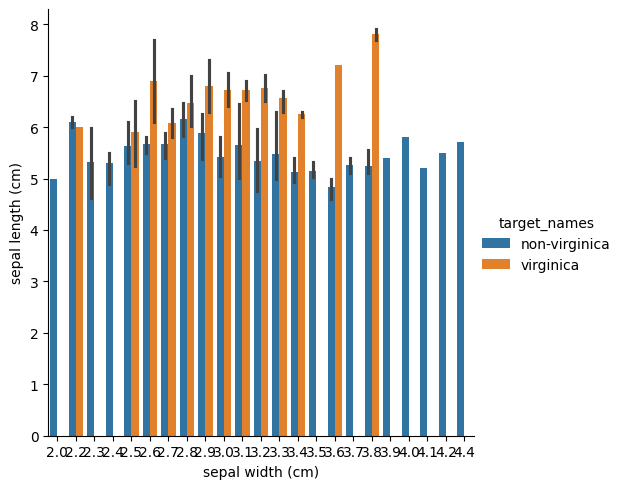

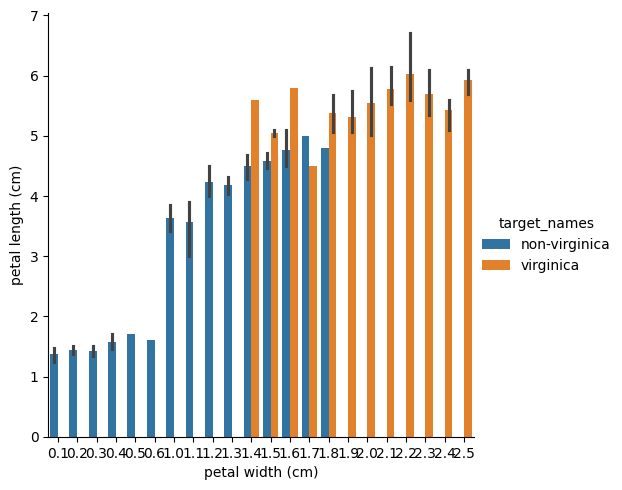

In [71]:
sns.catplot(data=iris_dataframe, kind='bar', x='sepal width (cm)', y='sepal length (cm)', hue='target_names')
sns.catplot(data=iris_dataframe, kind='bar', x='petal width (cm)', y='petal length (cm)', hue='target_names')
plt.show()

### 6. Split the data to a train set, a validation set and a test set.

In [72]:
# Add index column
iris_dataframe['index'] = iris_dataframe.reset_index().index

target_names = {
    0:0,
    1:1,
    2:1
}
x = np.array(iris.data)
target = np.array(iris_dataframe['target'].map(target_names)).reshape(-1, 1)
index = np.array(iris_dataframe['index']).reshape(-1, 1)
y = np.concatenate((target, index), axis=1)

train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_ratio, shuffle=True, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), shuffle=True, random_state=42)

### 7. Run four logistic regression models

**One feature model** <br/>
According the 4 histograms above, feature 'petal width (cm)' distinguishes best between viriginica and non-viriginica.<br/>
So 'petal width (cm)' is chosen as the feature to build this model.

In [73]:
models = list()
model1feature = LogisticRegression(max_iter = 1000, random_state=42)
model1feature.fit(x_train[:, 3:4], y_train[:, 0])
models.append(model1feature)

**Two feature model** <br/>
According the Scatter graph above, feature 'petal width (cm)' and 'petal length (cm)' distinguishes best between viriginica and non-viriginica.<br/>
So I chosen 'petal width (cm)' and 'petal length (cm)' as traning feature for this model.

In [74]:
model2feature = LogisticRegression(max_iter = 1000, random_state=42)
model2feature.fit(x_train[:, 2:4], y_train[:, 0])
models.append(model2feature)

**Three feature model** <br/>
Chosen 'sepal length (cm)', 'petal width (cm)' and 'petal length (cm)' for traning this model

In [75]:
model3feature = LogisticRegression(max_iter = 1000, random_state=42)
model3feature.fit(np.delete(x_train, [1], axis=1), y_train[:, 0])
models.append(model3feature)

**Four feature model** <br/>
Chosen all feature for traning this model

In [76]:
model4feature = LogisticRegression(max_iter = 1000, random_state=42)
model4feature.fit(x_train, y_train[:, 0])
models.append(model4feature)

### 8. Evaluate the models on the validation set

In [77]:
result_pds = list()
for i in range(x.shape[1]):
    result_pds.append(pd.DataFrame(columns=['Index', 'Probability', 'Prediction', 'GroundTruth'], index=range(15)))
    result_pds[i]['Prediction'] = models[i].predict(x_val[:, :i+1])
    result_pds[i]['Probability'] = models[i].predict_proba(x_val[:, :i+1])[:, 1]
    result_pds[i]['GroundTruth'] = y_val[:, 0]
    result_pds[i]['Index'] = y_val[:, 1]

Print first model's result

In [78]:
result_pds[0]

,Index,Probability,Prediction,GroundTruth
0,26,1.0,1,0
1,18,1.0,1,0
2,118,1.0,1,1
3,145,1.0,1,1
4,78,1.0,1,1
5,127,1.0,1,1
6,108,1.0,1,1
7,55,1.0,1,1
8,30,1.0,1,0
9,29,1.0,1,0


Print second model's result

In [79]:
result_pds[1]

,Index,Probability,Prediction,GroundTruth
0,26,0.999783,1,0
1,18,0.999975,1,0
2,118,0.999999,1,1
3,145,0.999995,1,1
4,78,0.999970,1,1
5,127,0.999979,1,1
6,108,0.999992,1,1
7,55,0.999930,1,1
8,30,0.999516,1,0
9,29,0.999440,1,0


Print third model's result

In [80]:
result_pds[2]

,Index,Probability,Prediction,GroundTruth
0,26,0.924986,1,0
1,18,0.978310,1,0
2,118,0.998854,1,1
3,145,0.996701,1,1
4,78,0.989428,1,1
5,127,0.994610,1,1
6,108,0.993935,1,1
7,55,0.985230,1,1
8,30,0.847900,1,0
9,29,0.873248,1,0


Print fourth model's result

In [81]:
result_pds[3]

,Index,Probability,Prediction,GroundTruth
0,26,0.038631,0,0
1,18,0.041479,0,0
2,118,0.999995,1,1
3,145,0.999490,1,1
4,78,0.993865,1,1
5,127,0.997979,1,1
6,108,0.999863,1,1
7,55,0.992346,1,1
8,30,0.038541,0,0
9,29,0.033952,0,0


### 9. Print the accuracy of each model
accuracy = (count(predication == GroudTruth) / count(Validation set))

In [82]:
for i in range(x.shape[1]):
    print('The accuracy of Model {:} is: {:.2f}%'.format(i, (result_pds[i]["Prediction"] == result_pds[i]["GroundTruth"]).sum()/15*100))

The accuracy of Model 0 is: 66.67%
The accuracy of Model 1 is: 66.67%
The accuracy of Model 2 is: 66.67%
The accuracy of Model 3 is: 100.00%


### 10. Plot the decision boundary for models

**One feature model graph**

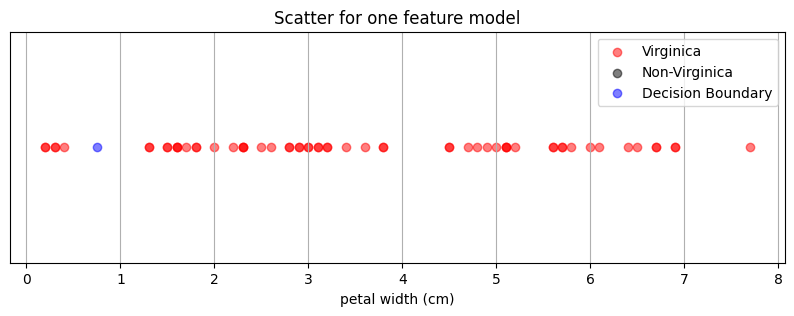

In [83]:
decision_boundary_point = np.array(-models[0].intercept_ / models[0].coef_[0])

y_pred = np.array(result_pds[0]['Prediction'])
y_virginica = x_val[y_pred == 1, : ]
y_non_virginica = x_val[y_pred == 0, : ]

plt.figure(figsize=(10, 3))
plt.scatter(y_virginica, np.zeros_like(y_virginica), color='red', alpha=0.5, label='Virginica')
plt.scatter(y_non_virginica, np.zeros_like(y_non_virginica), color='black', alpha=0.5, label='Non-Virginica')
plt.scatter(decision_boundary_point, np.zeros_like(decision_boundary_point), color='blue', alpha=0.5, label='Decision Boundary')
plt.title('Scatter for one feature model')
plt.xlabel('petal width (cm)')
plt.yticks([])
plt.grid(axis='x')
plt.legend()
plt.show()


**Two features model graph**

In [86]:
y_pred = np.array(result_pds[1]['Prediction'])
y_virginica = x_val[y_pred == 1, : ]
y_non_virginica = x_val[y_pred == 0, : ]

features = x_val[:, 2:4]
virginica = features[y_pred == 1, :]
non_virginica = features[y_pred == 0, :]

trace0 = go.Scatter(x=virginica[:, 0], y=virginica[:, 1], mode='markers', marker=dict(color='red'), name='Virginica')
trace1 = go.Scatter(x=non_virginica[:, 1], y=non_virginica[:, 1], mode='markers', marker=dict(color='black'), name='Non-Virginica')

x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1

random_x = np.linspace(x_min, x_max, 100)
random_y = -models[1].intercept_ / models[1].coef_[0][1] - models[1].coef_[0][0] / models[1].coef_[0][1] * random_x

trace2 = go.Scatter(x=random_x, y=random_y, mode='lines', name='Decision Boundary')

layout = go.Layout(title='Scatter for two feature model',
                   xaxis=dict(title='petal length (cm)'),
                   yaxis=dict(title='petal width (cm)'),
                   showlegend=True, width=800, height=600)

fig = go.Figure(data=[trace0, trace1, trace2], layout=layout)
fig.show()

**Three features model graph**

In [88]:
y_pred = np.array(result_pds[0]['Prediction'])
y_virginica = x_val[y_pred == 1, : ]
y_non_virginica = x_val[y_pred == 0, : ]

features = np.delete(x_val, [1], axis=1)
virginica = features[y_pred == 1, :]
non_virginica = features[y_pred == 0, :]

trace0 = go.Scatter3d(x=virginica[:, 0], y=virginica[:, 1], z=virginica[:, 2], mode='markers', marker=dict(color='red'), name='Virginica')
trace1 = go.Scatter3d(x=non_virginica[:, 1], y=non_virginica[:, 1], z=non_virginica[:, 2], mode='markers', marker=dict(color='black'), name='Non-Virginica')

x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
z_min, z_max = features[:, 2].min() - 1, features[:, 2].max() + 1

random_x, random_y = np.meshgrid(np.linspace(x_min, x_max, 10), np.linspace(y_min, y_max, 10))
random_z = -models[2].intercept_ / models[2].coef_[0][2] - models[2].coef_[0][0] / models[2].coef_[0][2] * random_x - models[2].coef_[0][1] / models[2].coef_[0][2] * random_y

trace2 = go.Surface(x=random_x, y=random_y, z=random_z, surfacecolor=random_z, colorscale=[[0, 'lightgray'], [1, 'lightgray']], opacity=0.5, showscale=False, name='Decision Boundary')

layout = go.Layout(title='Scatter for three feature model',
                   scene=dict(xaxis=dict(title='sepal length (cm)'),
                              yaxis=dict(title='petal length (cm)'),
                              zaxis=dict(title='petal width (cm)')),
                   showlegend=True, width=800, height=600)

fig = go.Figure(data=[trace0, trace1, trace2], layout=layout)
fig.show()

### 11. Failure models
According to the above graphs, the three models with significant prediction errors all have an accuracy of 66%.

### 12. Best Models
According to the test results in this report, the model with 4 features is the best one.